# Ejemplo de modelo de bolsa de palabras (Bag of Words)

HOLA MARIANA, PRUEBA DE JENNY

Este cuaderno es un ejemplo práctico de cómo se construye un modelo de bolsa de palabras a partir de un conjunto de documentos.

Para este ejemplo en específico vamos a utilizar un conjunto de datos público en español: Conjunto de oraciones en español que viene con `nltk`.

Holaaaaa


## 1. Importar librerías y descargar datos

In [ ]:
import nltk
from nltk.corpus import cess_esp
from nltk.tokenize import word_tokenize
from collections import Counter

# Descargar datos y tokenizadores
nltk.download('cess_esp')  # Conjunto de datos en español
nltk.download('punkt')  # Tokenizador para oraciones


[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 2. Cargar conjunto de datos

El corpus `cess_esp` contiene oraciones en español. Vamos a tomar algunas de estas oraciones para construir nuestro modelo de bolsa de palabras.

In [ ]:
# Tomar las primeras 10 oraciones del corpus
oraciones = cess_esp.sents()[:10]
print("Oraciones de ejemplo:")
for i, oracion in enumerate(oraciones):
    print(f"{i+1}: {' '.join(oracion)}")


Oraciones de ejemplo:
1: El grupo estatal Electricité_de_France -Fpa- EDF -Fpt- anunció hoy , jueves , la compra del 51_por_ciento de la empresa mexicana Electricidad_Águila_de_Altamira -Fpa- EAA -Fpt- , creada por el japonés Mitsubishi_Corporation para poner_en_marcha una central de gas de 495 megavatios .
2: Una portavoz de EDF explicó a EFE que el proyecto para la construcción de Altamira_2 , al norte de Tampico , prevé la utilización de gas natural como combustible principal en una central de ciclo combinado que debe empezar a funcionar en mayo_del_2002 .
3: La electricidad producida pasará a la red eléctrica pública de México en_virtud_de un acuerdo de venta de energía de EAA con la Comisión_Federal_de_Electricidad -Fpa- CFE -Fpt- por una duración de 25 años .
4: EDF , que no quiso revelar cuánto *0* pagó por su participación mayoritaria en EAA , intervendrá como asistente en la construcción de Altamira_2 y , posteriormente , *0* se encargará de explotarla como principal accionist

## 3. Preprocesamiento de texto

# Para construir la bolsa de palabras, necesitamos tokenizar las oraciones y convertirlas en minúsculas.

In [ ]:
# Tokenizar y convertir a minúsculas
oraciones_tokenizadas = [' '.join(oracion).lower() for oracion in oraciones]
print("\nOraciones tokenizadas y en minúsculas:")
for i, oracion in enumerate(oraciones_tokenizadas):
    print(f"{i+1}: {oracion}")



Oraciones tokenizadas y en minúsculas:
1: el grupo estatal electricité_de_france -fpa- edf -fpt- anunció hoy , jueves , la compra del 51_por_ciento de la empresa mexicana electricidad_águila_de_altamira -fpa- eaa -fpt- , creada por el japonés mitsubishi_corporation para poner_en_marcha una central de gas de 495 megavatios .
2: una portavoz de edf explicó a efe que el proyecto para la construcción de altamira_2 , al norte de tampico , prevé la utilización de gas natural como combustible principal en una central de ciclo combinado que debe empezar a funcionar en mayo_del_2002 .
3: la electricidad producida pasará a la red eléctrica pública de méxico en_virtud_de un acuerdo de venta de energía de eaa con la comisión_federal_de_electricidad -fpa- cfe -fpt- por una duración de 25 años .
4: edf , que no quiso revelar cuánto *0* pagó por su participación mayoritaria en eaa , intervendrá como asistente en la construcción de altamira_2 y , posteriormente , *0* se encargará de explotarla como p

## 4. Construir la bolsa de palabras

Vamos a crear la bolsa de palabras utilizando un `Counter` para contar la frecuencia de cada palabra en el conjunto de oraciones.

In [ ]:
# Tokenizar palabras y contar frecuencias
tokens = word_tokenize(' '.join(oraciones_tokenizadas))
frecuencia_palabras = Counter(tokens)

print("\nBolsa de palabras (frecuencia de cada palabra):")
for palabra, frecuencia in frecuencia_palabras.items():
    print(f"{palabra}: {frecuencia}")



Bolsa de palabras (frecuencia de cada palabra):
el: 8
grupo: 1
estatal: 1
electricité_de_france: 1
-fpa-: 5
edf: 5
-fpt-: 5
anunció: 1
hoy: 3
,: 26
jueves: 1
la: 21
compra: 1
del: 3
51_por_ciento: 1
de: 29
empresa: 1
mexicana: 1
electricidad_águila_de_altamira: 1
eaa: 3
creada: 1
por: 6
japonés: 1
mitsubishi_corporation: 1
para: 7
poner_en_marcha: 1
una: 8
central: 3
gas: 3
495: 2
megavatios: 3
.: 10
portavoz: 1
explicó: 1
a: 11
efe: 1
que: 11
proyecto: 1
construcción: 2
altamira_2: 2
al: 3
norte: 1
tampico: 1
prevé: 1
utilización: 1
natural: 2
como: 6
combustible: 1
principal: 2
en: 12
ciclo: 1
combinado: 1
debe: 1
empezar: 1
funcionar: 1
mayo_del_2002: 1
electricidad: 1
producida: 1
pasará: 1
red: 1
eléctrica: 1
pública: 1
méxico: 2
en_virtud_de: 1
un: 2
acuerdo: 1
venta: 1
energía: 1
con: 5
comisión_federal_de_electricidad: 1
cfe: 1
duración: 1
25: 1
años: 2
no: 3
quiso: 1
revelar: 1
cuánto: 1
*: 20
0: 10
pagó: 1
su: 1
participación: 1
mayoritaria: 1
intervendrá: 1
asistente: 1
y: 

## 5. Represenación de la bolsa de palabras

Vamos a representar la bolsa de palabras (BoW) como una matriz. Cada fila representa una oración (documento) y cada columna representa una palabra del vocabulario

In [ ]:
# Crear vocabulario
vocabulario = sorted(frecuencia_palabras)
print("\nVocabulario:", vocabulario)

# Crear la matriz de bolsa de palabras
matriz_bolsa_palabras = []
for oracion in oraciones_tokenizadas:
    tokens_oracion = word_tokenize(oracion)
    fila = [tokens_oracion.count(palabra) for palabra in vocabulario]
    matriz_bolsa_palabras.append(fila)

print("\nMatriz de Bolsa de Palabras:")
for fila in matriz_bolsa_palabras:
    print(fila)



Vocabulario: ['*', ',', '-fpa-', '-fpt-', '.', '0', '134', '186', '194', '1998', '247', '25', '28', '495', '51_por_ciento', ':', '``', 'a', 'abrazo', 'accionista', 'acuerdo', 'administrar', 'al', 'alcaldesa', 'altamira', 'altamira_2', 'ante', 'anunció', 'apuesten', 'aseguró', 'asistente', 'ataque', 'aznar', 'años', 'cabeza', 'cada', 'capital', 'cariño', 'celia_villalobos', 'central', 'centrales', 'cfe', 'ciclo', 'combinado', 'combustible', 'comisión_federal_de_electricidad', 'como', 'compañía', 'compra', 'con', 'confesó', 'congreso', 'construcción', 'construir', 'convencer', 'creada', 'cuya', 'cuánto', 'de', 'debe', 'definió', 'defraudar', 'del', 'desde', 'dio', 'diputada', 'diálogo', 'dos', 'duración', 'dólares', 'eaa', 'edf', 'efe', 'el', 'elecciones', 'electa', 'electoral', 'electricidad', 'electricidad_águila_de_altamira', 'electricité_de_france', 'elegido', 'ellos', 'eléctrica', 'eléctricas', 'emocionada', 'emoción', 'empezar', 'empresa', 'en', 'en_virtud_de', 'encargará', 'energ

In [ ]:
print(len(voca))

# Ejemplo de modelo TF-IDF

## 1. Importar librerías y descargar datos

In [ ]:
import nltk
from nltk.corpus import cess_esp
from nltk.tokenize import word_tokenize
from collections import Counter
from math import log # No se necesitaba para BoW

# Descargar datos y tokenizadores
nltk.download('cess_esp')  # Conjunto de datos en español
nltk.download('punkt')  # Tokenizador para oraciones


[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 2. Cargar conjunto de datos

In [ ]:
# Tomar las primeras 10 oraciones del corpus
oraciones = cess_esp.sents()[:10]
print("Oraciones de ejemplo:")
for i, oracion in enumerate(oraciones):
    print(f"{i+1}: {' '.join(oracion)}")


Oraciones de ejemplo:
1: El grupo estatal Electricité_de_France -Fpa- EDF -Fpt- anunció hoy , jueves , la compra del 51_por_ciento de la empresa mexicana Electricidad_Águila_de_Altamira -Fpa- EAA -Fpt- , creada por el japonés Mitsubishi_Corporation para poner_en_marcha una central de gas de 495 megavatios .
2: Una portavoz de EDF explicó a EFE que el proyecto para la construcción de Altamira_2 , al norte de Tampico , prevé la utilización de gas natural como combustible principal en una central de ciclo combinado que debe empezar a funcionar en mayo_del_2002 .
3: La electricidad producida pasará a la red eléctrica pública de México en_virtud_de un acuerdo de venta de energía de EAA con la Comisión_Federal_de_Electricidad -Fpa- CFE -Fpt- por una duración de 25 años .
4: EDF , que no quiso revelar cuánto *0* pagó por su participación mayoritaria en EAA , intervendrá como asistente en la construcción de Altamira_2 y , posteriormente , *0* se encargará de explotarla como principal accionist

## 3. Preprocesamiento de texto

In [ ]:
# Tokenizar y convertir a minúsculas
oraciones_tokenizadas = [' '.join(oracion).lower() for oracion in oraciones]
print("\nOraciones tokenizadas y en minúsculas:")
for i, oracion in enumerate(oraciones_tokenizadas):
    print(f"{i+1}: {oracion}")



Oraciones tokenizadas y en minúsculas:
1: el grupo estatal electricité_de_france -fpa- edf -fpt- anunció hoy , jueves , la compra del 51_por_ciento de la empresa mexicana electricidad_águila_de_altamira -fpa- eaa -fpt- , creada por el japonés mitsubishi_corporation para poner_en_marcha una central de gas de 495 megavatios .
2: una portavoz de edf explicó a efe que el proyecto para la construcción de altamira_2 , al norte de tampico , prevé la utilización de gas natural como combustible principal en una central de ciclo combinado que debe empezar a funcionar en mayo_del_2002 .
3: la electricidad producida pasará a la red eléctrica pública de méxico en_virtud_de un acuerdo de venta de energía de eaa con la comisión_federal_de_electricidad -fpa- cfe -fpt- por una duración de 25 años .
4: edf , que no quiso revelar cuánto *0* pagó por su participación mayoritaria en eaa , intervendrá como asistente en la construcción de altamira_2 y , posteriormente , *0* se encargará de explotarla como p

## 4. Calcular la frecuencia de términos (TF)

Vamos a calcular la frecuencia de términos para cada palabra en cada documento. Para este ejercicio definiremos "frecuencia de término" simplemente como el conteo de la palabra específica dividida por el total de palabras del documento.

$$
TF(w,d) = \frac{\text{Cantidad de veces que aparece } w \text{ en }d}{\text{Cantidad total de tokens que contiene }d}
$$

In [ ]:
# Tokenizar palabras en cada documento
documentos_tokenizados = [word_tokenize(oracion) for oracion in oraciones_tokenizadas]

# Calcular TF
tf = []
for tokens in documentos_tokenizados:
    frecuencia_palabras = Counter(tokens)
    total_palabras = len(tokens)
    tf.append({palabra: frecuencia / total_palabras for palabra, frecuencia in frecuencia_palabras.items()})

print("\nFrecuencia de Términos (TF) por documento:")
for i, doc_tf in enumerate(tf):
    print(f"Documento {i+1}: {doc_tf}")



Frecuencia de Términos (TF) por documento:
Documento 1: {'el': 0.05, 'grupo': 0.025, 'estatal': 0.025, 'electricité_de_france': 0.025, '-fpa-': 0.05, 'edf': 0.025, '-fpt-': 0.05, 'anunció': 0.025, 'hoy': 0.025, ',': 0.075, 'jueves': 0.025, 'la': 0.05, 'compra': 0.025, 'del': 0.025, '51_por_ciento': 0.025, 'de': 0.075, 'empresa': 0.025, 'mexicana': 0.025, 'electricidad_águila_de_altamira': 0.025, 'eaa': 0.025, 'creada': 0.025, 'por': 0.025, 'japonés': 0.025, 'mitsubishi_corporation': 0.025, 'para': 0.025, 'poner_en_marcha': 0.025, 'una': 0.025, 'central': 0.025, 'gas': 0.025, '495': 0.025, 'megavatios': 0.025, '.': 0.025}
Documento 2: {'una': 0.045454545454545456, 'portavoz': 0.022727272727272728, 'de': 0.11363636363636363, 'edf': 0.022727272727272728, 'explicó': 0.022727272727272728, 'a': 0.045454545454545456, 'efe': 0.022727272727272728, 'que': 0.045454545454545456, 'el': 0.022727272727272728, 'proyecto': 0.022727272727272728, 'para': 0.022727272727272728, 'la': 0.045454545454545456,

## 5. Calcular la frecuencia inversa de documentos (IDF)

Vamos a calcular el IDF para cada palabra en el conjunto de documentos.

Recordemos que el IDF se calcula para un término en todo el corpus:

$$
IDF(w,D)=log(\frac{\text{Cantidad de documentos que contienen el token }w}{\text{Cantidad total de documentos en el conjunto }D}​)
$$

In [ ]:
# Crear un conjunto de todas las palabras únicas en el corpus (vocabulario)
palabras_unicas = set(word for tokens in documentos_tokenizados for word in tokens)

# Calcular IDF
idf = {}
total_documentos = len(oraciones_tokenizadas)
for palabra in palabras_unicas:
    # Contar cuántos documentos contienen la palabra
    documentos_contienen_palabra = sum(1 for tokens in documentos_tokenizados if palabra in tokens)
    idf[palabra] = log(total_documentos / (1 + documentos_contienen_palabra))  # Se suma 1 para evitar división por cero

print("\nFrecuencia Inversa de Documentos (IDF):")
print(idf)



Frecuencia Inversa de Documentos (IDF):
{'electricidad': 1.6094379124341003, 'revelar': 1.6094379124341003, 'cfe': 1.6094379124341003, 'ciclo': 1.6094379124341003, 'honradez': 1.6094379124341003, 'tampico': 1.6094379124341003, 'explicó': 1.6094379124341003, 'dio': 1.2039728043259361, 'elecciones': 1.6094379124341003, '25': 1.6094379124341003, 'licencias': 1.6094379124341003, 'y': 0.22314355131420976, '194': 1.6094379124341003, 'sepan': 1.6094379124341003, 'insulto': 1.6094379124341003, 'villalobos': 1.2039728043259361, 'generales': 1.6094379124341003, 'victoria': 1.2039728043259361, 'invertir': 1.6094379124341003, 'eaa': 0.9162907318741551, 'sabido': 1.6094379124341003, 'josé_maría_aznar': 1.6094379124341003, 'ellos': 1.6094379124341003, 'mitsubishi_corporation': 1.6094379124341003, 'empezar': 1.6094379124341003, 'por': 0.3566749439387324, 'mayoritaria': 1.6094379124341003, 'en': 0.5108256237659907, 'alcaldesa': 1.6094379124341003, 'capital': 1.6094379124341003, 'red': 1.6094379124341

## 6. Calcular TF-IDF

Vamos a multiplicar los valores TF e IDF para obtener el TF-IDF

$$
TFIDF(w, d, D) = TF(w, d) \times IDF(w, D)
$$

In [ ]:
# Calcular TF-IDF
tfidf = []
for doc_tf in tf:
    tfidf_doc = {palabra: tf_valor * idf[palabra] for palabra, tf_valor in doc_tf.items()}
    tfidf.append(tfidf_doc)

print("\nTF-IDF por documento:")
for i, doc_tfidf in enumerate(tfidf):
    print(f"Documento {i+1}: {doc_tfidf}")



TF-IDF por documento:
Documento 1: {'el': 0.01783374719693662, 'grupo': 0.04023594781085251, 'estatal': 0.04023594781085251, 'electricité_de_france': 0.04023594781085251, '-fpa-': 0.04581453659370776, 'edf': 0.012770640594149769, '-fpt-': 0.04581453659370776, 'anunció': 0.04023594781085251, 'hoy': 0.02290726829685388, ',': 0.007902038674336975, 'jueves': 0.04023594781085251, 'la': 0.0, 'compra': 0.04023594781085251, 'del': 0.02290726829685388, '51_por_ciento': 0.04023594781085251, 'de': 0.007902038674336975, 'empresa': 0.04023594781085251, 'mexicana': 0.04023594781085251, 'electricidad_águila_de_altamira': 0.04023594781085251, 'eaa': 0.02290726829685388, 'creada': 0.04023594781085251, 'por': 0.00891687359846831, 'japonés': 0.04023594781085251, 'mitsubishi_corporation': 0.04023594781085251, 'para': 0.012770640594149769, 'poner_en_marcha': 0.04023594781085251, 'una': 0.00891687359846831, 'central': 0.02290726829685388, 'gas': 0.02290726829685388, '495': 0.030099320108148406, 'megavatios

## 7. Representar matriz TF-IDF

Por último, vamos a observar cómo se visualiza la matriz.

In [ ]:
# Crear una lista ordenada del vocabulario
vocabulario = sorted(idf.keys())
print(vocabulario)
# Crear la matriz de TF-IDF
matriz_tfidf = []
for doc_tfidf in tfidf:
    fila = [doc_tfidf.get(palabra, 0) for palabra in vocabulario]
    matriz_tfidf.append(fila)

print("\nMatriz TF-IDF:")
for fila in matriz_tfidf:
    print(fila)


['*', ',', '-fpa-', '-fpt-', '.', '0', '134', '186', '194', '1998', '247', '25', '28', '495', '51_por_ciento', ':', '``', 'a', 'abrazo', 'accionista', 'acuerdo', 'administrar', 'al', 'alcaldesa', 'altamira', 'altamira_2', 'ante', 'anunció', 'apuesten', 'aseguró', 'asistente', 'ataque', 'aznar', 'años', 'cabeza', 'cada', 'capital', 'cariño', 'celia_villalobos', 'central', 'centrales', 'cfe', 'ciclo', 'combinado', 'combustible', 'comisión_federal_de_electricidad', 'como', 'compañía', 'compra', 'con', 'confesó', 'congreso', 'construcción', 'construir', 'convencer', 'creada', 'cuya', 'cuánto', 'de', 'debe', 'definió', 'defraudar', 'del', 'desde', 'dio', 'diputada', 'diálogo', 'dos', 'duración', 'dólares', 'eaa', 'edf', 'efe', 'el', 'elecciones', 'electa', 'electoral', 'electricidad', 'electricidad_águila_de_altamira', 'electricité_de_france', 'elegido', 'ellos', 'eléctrica', 'eléctricas', 'emocionada', 'emoción', 'empezar', 'empresa', 'en', 'en_virtud_de', 'encargará', 'energía', 'es', 'es

# Ejemplo de modelo de _Latent Semantic Analysis_ (LSA)


## 1. Obtener Matriz TF-IDF

In [ ]:
import nltk
from nltk.corpus import cess_esp
from nltk.tokenize import word_tokenize
from collections import Counter
from math import log
import numpy as np

# Descargar datos y tokenizadores
nltk.download('cess_esp')  # Conjunto de datos en español
nltk.download('punkt')  # Tokenizador para oraciones

# Tomar las primeras 10 oraciones del corpus
oraciones = cess_esp.sents()[:10]

# Tokenizar y convertir a minúsculas
oraciones_tokenizadas = [' '.join(oracion).lower() for oracion in oraciones]

# Tokenizar palabras en cada documento
documentos_tokenizados = [
    word_tokenize(oracion) for oracion in oraciones_tokenizadas
]

# Calcular TF
tf = []
for tokens in documentos_tokenizados:
    frecuencia_palabras = Counter(tokens)
    total_palabras = len(tokens)
    tf.append(
        {
            palabra: frecuencia / total_palabras for palabra,
            frecuencia in frecuencia_palabras.items()
        }
    )

# Crear un conjunto de todas las palabras únicas en el corpus (vocabulario)
palabras_unicas = set(
    word for tokens in documentos_tokenizados for word in tokens
)

# Calcular IDF
idf = {}
total_documentos = len(oraciones_tokenizadas)
for palabra in palabras_unicas:
    # Contar cuántos documentos contienen la palabra
    documentos_contienen_palabra = sum(
        1 for tokens in documentos_tokenizados if palabra in tokens
    )
    idf[palabra] = log(
        total_documentos / (1 + documentos_contienen_palabra)
    )  # Se suma 1 para evitar división por cero

# Crear una lista ordenada del vocabulario
vocabulario = sorted(idf.keys())

# Calcular TF-IDF para cada documento
tfidf = []
for doc_tf in tf:
    tfidf.append(
        {
            palabra: tf_value * idf[palabra] for palabra,
            tf_value in doc_tf.items()
        }
    )

# Crear la matriz TF-IDF
matriz_tfidf = []
for doc_tfidf in tfidf:
    fila = [doc_tfidf.get(palabra, 0) for palabra in vocabulario]
    matriz_tfidf.append(fila)

matriz_tfidf = np.array(matriz_tfidf)
print("\nMatriz TF-IDF:")
print(matriz_tfidf)



Matriz TF-IDF:
[[0.         0.00790204 0.04581454 ... 0.         0.         0.        ]
 [0.         0.00478911 0.         ... 0.         0.         0.        ]
 [0.         0.         0.02776639 ... 0.         0.         0.        ]
 ...
 [0.01209068 0.00357154 0.         ... 0.         0.02040632 0.00378209]
 [0.03292384 0.00324186 0.         ... 0.01852266 0.         0.01029893]
 [0.028534   0.01053605 0.         ... 0.         0.02407946 0.00892574]]


[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 2. Calcular _Singular Value Decomposition_ (SVD)

Podemos reducir dimensiones a partir de descomponer la matriz en sus valores singulares para recomponerla posteriormente.


In [ ]:
from sklearn.decomposition import TruncatedSVD

# Aplicar SVD (puede reducirse a cualquier número de dimensiones)
# Aprovechamos para reducir a 2 dimensiones pensando en un ejemplo futuro
svd = TruncatedSVD(n_components=2)
matriz_lsi = svd.fit_transform(matriz_tfidf)

print("\nMatriz LSI:")
print(matriz_lsi)



Matriz LSI:
[[ 0.0842422  -0.03822287]
 [ 0.03828897  0.0149093 ]
 [ 0.11354464 -0.07465865]
 [ 0.04096648  0.03917424]
 [ 0.05187158  0.02144943]
 [ 0.11678241 -0.06022394]
 [ 0.04313018  0.0758499 ]
 [ 0.04889247  0.07480675]
 [ 0.04601838  0.0839968 ]
 [ 0.04843477  0.09595489]]


Con esto ya tendríamos listo lo que queremos observar, sin embargo, podemos aprovechar la matriz para crear una visualización sencilla.

## 3. Visualizar los resultados

Podemos visualizar los documentos en el espacio reducido de LSI para entender cómo están relacionados semánticamente.

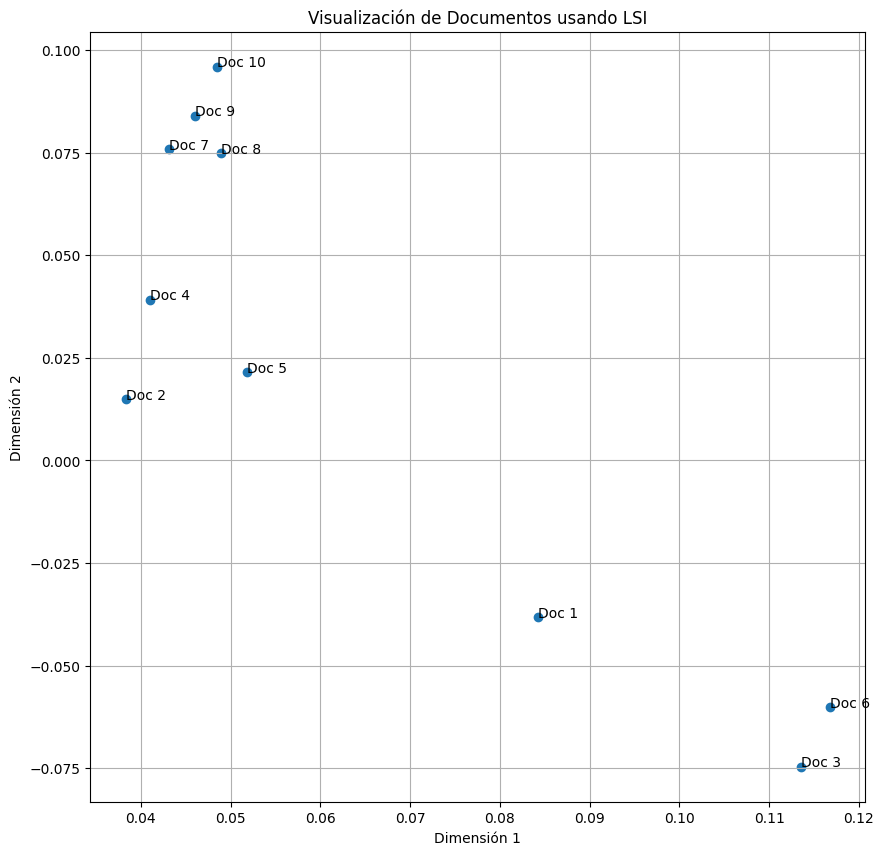

In [ ]:
import matplotlib.pyplot as plt

# Visualizar la matriz LSI
plt.figure(figsize=(10, 10))
plt.scatter(matriz_lsi[:, 0], matriz_lsi[:, 1])

# Anotar los puntos con los índices de los documentos
for i in range(len(matriz_lsi)):
    plt.annotate(f'Doc {i+1}', (matriz_lsi[i, 0], matriz_lsi[i, 1]))

plt.title('Visualización de Documentos usando LSI')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.grid(True)
plt.show()


# Ejemplo de modelo Word2Vec

## 1. Entrenar el modelo Word2Vec

In [ ]:
import nltk
from nltk.corpus import cess_esp
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import numpy as np

# Descargar datos y tokenizadores
nltk.download('cess_esp')
nltk.download('punkt')

# Tomar las primeras 10 oraciones del corpus
oraciones = cess_esp.sents()[:10]

# Tokenizar y convertir a minúsculas
oraciones_tokenizadas = [' '.join(oracion).lower() for oracion in oraciones]
documentos_tokenizados = [
    word_tokenize(oracion) for oracion in oraciones_tokenizadas
]

# Entrenar el modelo Word2Vec utilizando CBOW
model_w2v = Word2Vec(
    sentences=documentos_tokenizados,
    vector_size=100,
    window=5,
    min_count=1,
    sg=0
)

# Mostrar un ejemplo de vector para una palabra
vector_mexicana = model_w2v.wv['mexicana']
print("Vector para 'mexicana' con Word2Vec:")
print(vector_mexicana)


Vector para 'mexicana' con Word2Vec:
[ 3.1961864e-03  9.1267806e-03  6.6992021e-03 -9.9532921e-03
 -1.5531909e-03 -3.1142375e-03  9.6054003e-03 -2.8610216e-03
  2.0670568e-04  6.0627568e-03 -3.2061033e-03 -9.1443928e-03
  5.9535704e-04 -5.0330022e-03 -2.8576555e-03  8.1207873e-03
  6.0995278e-04  5.0991266e-03  1.2991469e-03 -4.6061310e-03
 -3.0392224e-03  5.6385766e-03  3.9088866e-03  8.4246211e-03
  6.3059959e-03  9.4749294e-03  9.8956004e-03  9.5413774e-03
  2.3349710e-03  8.3770597e-04 -1.1894736e-03 -7.8160223e-03
  5.4201642e-03  4.0814845e-04 -2.8073085e-03 -6.5219575e-03
  8.9597460e-03  7.8899396e-04  4.5296381e-04 -8.6342208e-03
 -7.7226325e-03  3.9769146e-03  4.6519837e-03 -8.7484764e-03
  1.2401929e-03 -4.3542194e-03  6.5732733e-03  7.1079317e-03
 -6.0906950e-03 -7.8567788e-03 -7.2234403e-03 -5.9238225e-03
  7.8604082e-03 -2.6910515e-03 -5.6352541e-03 -2.9947325e-03
  1.2823410e-03  6.2137963e-03 -3.8509653e-03 -8.3958935e-03
  7.5995438e-03 -1.5116308e-03  7.5969039e-03  6

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


para más información sobre gensim y particularmente sobre el modelo Word2Vec con llaves pueden visitar [models.keyedvectors – Store and query word vectors](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors)


## 2. Crear la Matriz de Word2Vec para los Documentos

In [ ]:
# Crear la matriz de Word2Vec para los documentos
def obtener_vector_documento(tokens, model):
    vector_documento = np.zeros(model.vector_size)
    contador_palabras = 0
    for palabra in tokens:
        if palabra in model.wv:
            vector_documento += model.wv[palabra]
            contador_palabras += 1
    if contador_palabras > 0:
        vector_documento /= contador_palabras
    return vector_documento

matriz_word2vec = np.array(
    [
        obtener_vector_documento(tokens, model_w2v)
        for tokens in documentos_tokenizados
    ]
)

print("\nMatriz de Word2Vec para documentos:")
print(matriz_word2vec)



Matriz de Word2Vec para documentos:
[[ 2.94720373e-04  1.85482213e-03  1.36354335e-03 -4.25808984e-04
   7.65424661e-04 -1.83485734e-03  8.40274628e-04  2.87117260e-03
  -1.47924513e-03 -1.08356528e-03 -1.12266598e-03 -3.25581184e-03
   5.08500492e-04  1.30084756e-03  9.22800475e-04 -8.71191977e-04
   1.14427549e-03  9.09914605e-05 -1.43405315e-03 -4.24027931e-03
   4.03787434e-04 -2.72263694e-04  5.20248585e-04 -9.99094325e-04
   8.20508310e-04  7.37686770e-04 -1.58134726e-03  5.21473031e-04
  -1.14456821e-03  1.91987010e-03  6.23269289e-04 -3.63983711e-04
   1.85148057e-03 -1.68329647e-03 -1.68101815e-03  1.07375441e-03
   3.67450637e-04 -8.95342077e-04  6.20892513e-04 -1.65251204e-03
  -3.41011885e-04 -1.10751832e-03 -1.28177752e-03  3.65766422e-04
   6.20702661e-04  2.18919331e-04 -1.02433334e-03 -8.80849809e-04
   1.12247940e-03  7.99191676e-04 -1.05375418e-03 -1.55567301e-03
   2.94266945e-04 -4.95457555e-04  9.50426905e-04  1.20780958e-03
   7.28352214e-05  3.01179184e-04 -6.38

## 3. Visualización

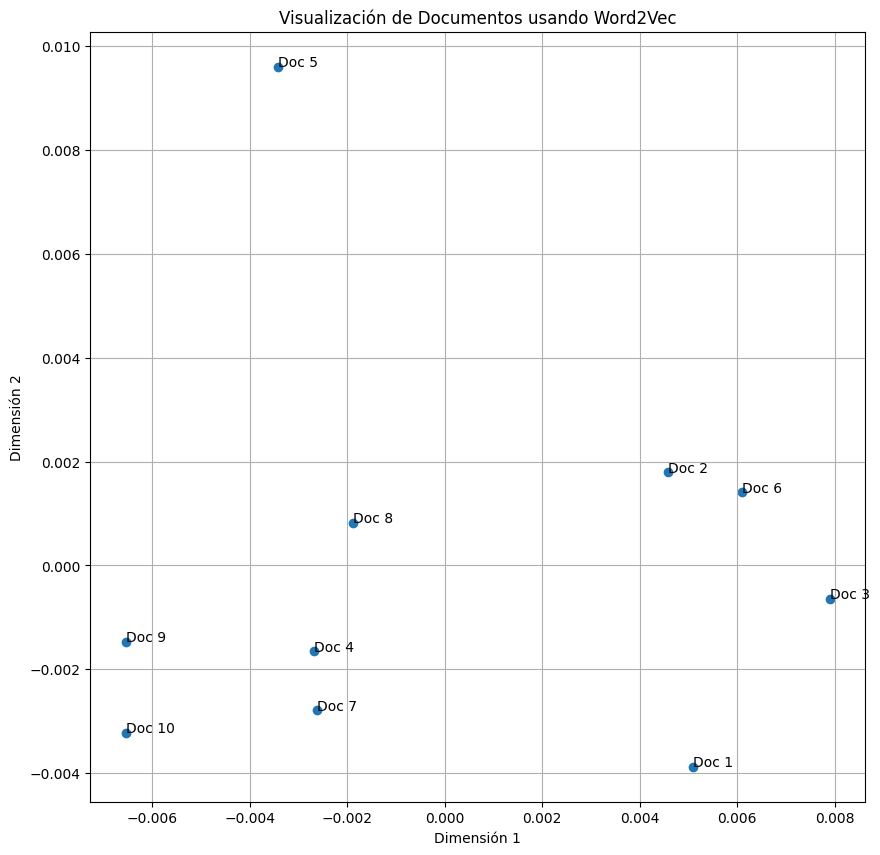

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir la dimensionalidad a 2D para visualización
pca = PCA(n_components=2)
matriz_reducida = pca.fit_transform(matriz_word2vec)

# Visualizar los documentos en el espacio reducido
plt.figure(figsize=(10, 10))
plt.scatter(matriz_reducida[:, 0], matriz_reducida[:, 1])

# Anotar los puntos con los índices de los documentos
for i in range(len(matriz_reducida)):
    plt.annotate(f'Doc {i+1}', (matriz_reducida[i, 0], matriz_reducida[i, 1]))

plt.title('Visualización de Documentos usando Word2Vec')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.grid(True)
plt.show()


Como tenemos pocos datos, los vectores de palabras que se generaron no son suficientes para agrupar mejor.